<a href="https://colab.research.google.com/github/priyaregit/Classification-ML_Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Health Insurance Cross Sell Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/priyaregit/Classification-ML_Cardiovascular-Risk-Prediction.git

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
!pip install scikit-optimize
from skopt import BayesSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Importing Matplotlib and Seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing warnings library to filter some warnings
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.7 MB/s eta 0:00:00


### Dataset Loading

In [ ]:
# Loading Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the data set from Google drive and storing it as dataframe: df

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised Learning- Classification/data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# Dataset First Look

# Checking the head (i.e. first 5 rows) of df
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

# Checking the shape of df
df.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info

# Checking information about dataset 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print(f"The duplicate data present in df is: {df.duplicated().sum()}")

The duplicate data present in df is: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

print(f"The number of missing/null values in dataset 'df' are: \n")
print(df.isnull().sum())

The number of missing/null values in dataset 'df' are: 

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


<Axes: >

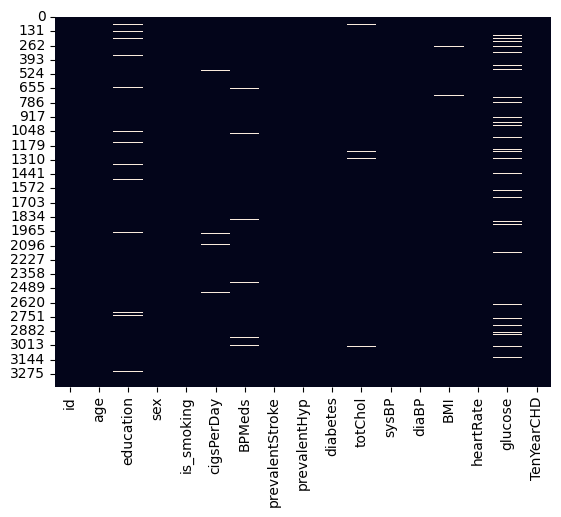

In [ ]:
# Visualizing the missing values

# Checking for missing/null values by plotting Heatmap of df
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset has 3390 rows (observations) and 17 columns (features).

There are no duplicate values in the dataset.

There are missing values in the features: 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate' and 'glucose'.

The features: 'sex' and 'is_smoking' are of object data type. The rest of the features are either of integer or float data type.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

print(f"The columns in the dataset are: \n",list(df.columns))

The columns in the dataset are: 
 ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [ ]:
# Dataset Describe

# Checking for statistics of the numeric columns
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


The age of the patients varies between 32 years and 70 years. The average age of the patients is 49.5 years.

The maximum cigarettes smoked by a patient in a day is 70.

The total cholestrol level of the patients varies between 107 and 696, the average being 237.

The systolic blood pressure of the patients varies between 83.5 and 295, the average being 132.6.

The diastolic blood pressure of the patients varies between 48 and 142.5, the average being 82.8.

The BMI (body mass index) of the patients varies between 15.96 and 56.8, the average being 25.8.

The heart rate of the patients varies between 45 and 143, the average being 75.8.

The glucose level of the patients varies between 40 and 394, the average being 82.

### Check Unique Values for each variable.

---



In [ ]:
# Check Unique Values for each variable.

print("Number of unique values in each of the features are:\n")
for i in df.columns.tolist():
  print(i,": ",df[i].nunique())

Number of unique values in each of the features are:

id :  3390
age :  39
education :  4
sex :  2
is_smoking :  2
cigsPerDay :  32
BPMeds :  2
prevalentStroke :  2
prevalentHyp :  2
diabetes :  2
totChol :  240
sysBP :  226
diaBP :  142
BMI :  1259
heartRate :  68
glucose :  132
TenYearCHD :  2


### Variables Description

The variables/features present in the dataset are:

* id : unique ID of each patient
* age : age of the patient
* education : indicates the level of education of the patient: 1, 2, 3, 4
* sex : whether the patient is Male or Female.
* is_smoking : whether the patient is a smoker or not
* cigsPerDay : cigarettes smoked per day
* BPMeds : whether the patient is taking blood pressure (BP) medication or not. 0 = No, 1 = Yes
* prevalentStroke : whether the patient has a history of stroke. 0 = No, 1 = Yes
* prevalentHyp : whether the patient has a history of hypertension. 0 = No, 1 = Yes
* diabetes : whether the patient has diabetes. 0 = No, 1 = Yes
* totChol : measure of total cholestrol level of the patient
* sysBP : measure of systolic blood pressure of the patient
* diaBP : measure of diastolic blood pressure of the patient
* BMI : body mass index of the patient
* heartRate : measure of heart rate of the patient
* glucose : measure of glucose level of the patient
* TenYearCHD : indicates whether the patient has a 10-year risk of future coronary heart disease (CHD). 0 = No, 1 = Yes

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

def age_group(age):

  if 31<=age<=40:
    agegroup = "31-40 Years"
  elif 41<=age<=50:
    agegroup = "41-50 Years"
  elif 51<=age<=60:
    agegroup = "51-60 Years"
  elif 61<=age<=70:
    agegroup = "61-70 Years"
  else:
    agegroup = "others"

  return agegroup

In [ ]:
df['Age_Group'] = df['age'].apply(age_group)
df['Age_Group'].value_counts()

41-50 Years    1283
51-60 Years    1041
31-40 Years     604
61-70 Years     462
Name: Age_Group, dtype: int64

In [ ]:
def bmi_categories(bmi):

  if bmi<18.5:
    category = "underweight"
  elif 18.5<=bmi<25:
    category = "healthy weight"
  elif 25<=bmi<30:
    category = "overweight"
  elif 30<=bmi<40:
    category = "obese"
  elif bmi>=40:
    category = "severe obesity"
  else:
    category = "unknown"

  return category

In [ ]:
df['BMI category'] = df['BMI'].apply(bmi_categories)
df['BMI category'].value_counts(normalize = True)

healthy weight    0.446018
overweight        0.408260
obese             0.123009
underweight       0.012094
severe obesity    0.006490
unknown           0.004130
Name: BMI category, dtype: float64

In [ ]:
columns = ['cigsPerDay','BPMeds','heartRate','glucose']

for col_name in columns:
  df[col_name] = df[col_name].astype(int)


In [ ]:
df.drop('id', axis = 1, inplace = True)

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age_Group,BMI category
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,61-70 Years,unknown
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,31-40 Years,overweight
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,41-50 Years,healthy weight
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,41-50 Years,overweight
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,61-70 Years,overweight


### What all manipulations have you done and insights you found?

The only manipulation I have done, is to create new columns to indicate the patients' age group and their BMI category.

Maximum number of patients belong to the 41-50 years age group followed by 51-60 years age group.

Majority of the patients (44.6%) have a healthy weight.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

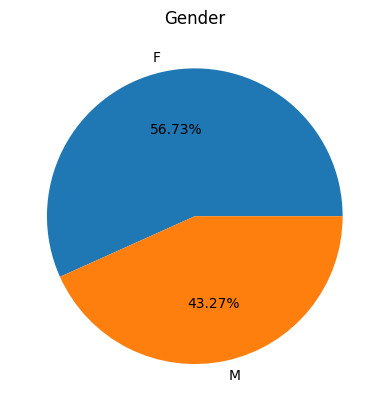

In [ ]:
# Chart - 1 visualization code

# Plotting a Pie Chart to visualize the number of patients by Gender
plt.pie(df['sex'].value_counts(), labels = df['sex'].value_counts().index, autopct = "%.02f%%")

# Giving a title to the plot
plt.title("Gender", fontsize = 12)

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In [ ]:
# Finding the value count of each Gender type
df['sex'].value_counts().reset_index().rename(columns={'index':'Gender','sex': 'Count'})

,Gender,Count
0,F,1923
1,M,1467


Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

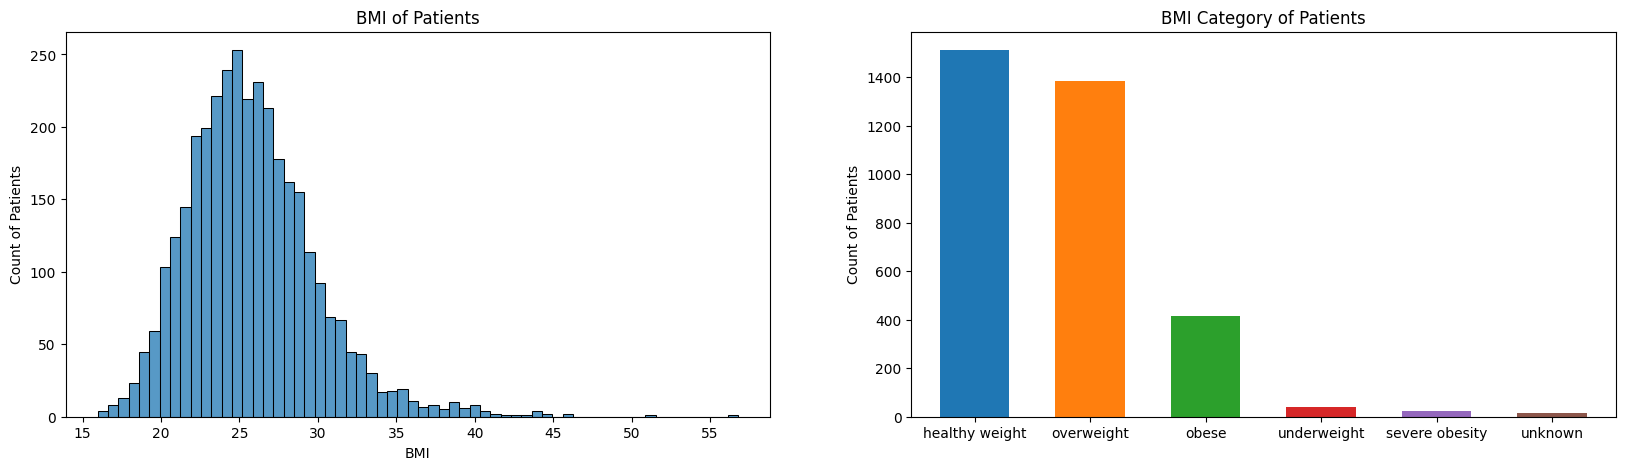

In [ ]:
# Chart - 2 visualization code

# Setting display figure size
fig = plt.figure(figsize = (20,5))

# Histogram to check for the patients' BMI
ax1 = plt.subplot2grid((1,2),(0,0))
sns.histplot(df["BMI"])
plt.xlabel("BMI")
plt.ylabel("Count of Patients")
plt.title("BMI of Patients", fontsize = 12)

# Bar chart to check for the patients' BMI category
ax1 = plt.subplot2grid((1,2),(0,1))
bmi = df["BMI category"].value_counts()
bmi.plot.bar(width = 0.6, color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])
plt.ylabel("Count of Patients")
plt.xticks(rotation = 'horizontal')
plt.title("BMI Category of Patients", fontsize = 12)

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

In [ ]:
# Finding the value count of patients belonging to each BMI category
df['BMI category'].value_counts(normalize = True).reset_index().rename(columns={'index':'BMI category','BMI category': 'Normalized Count'})

,BMI category,Normalized Count
0,healthy weight,0.446018
1,overweight,0.408260
2,obese,0.123009
3,underweight,0.012094
4,severe obesity,0.006490
5,unknown,0.004130


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

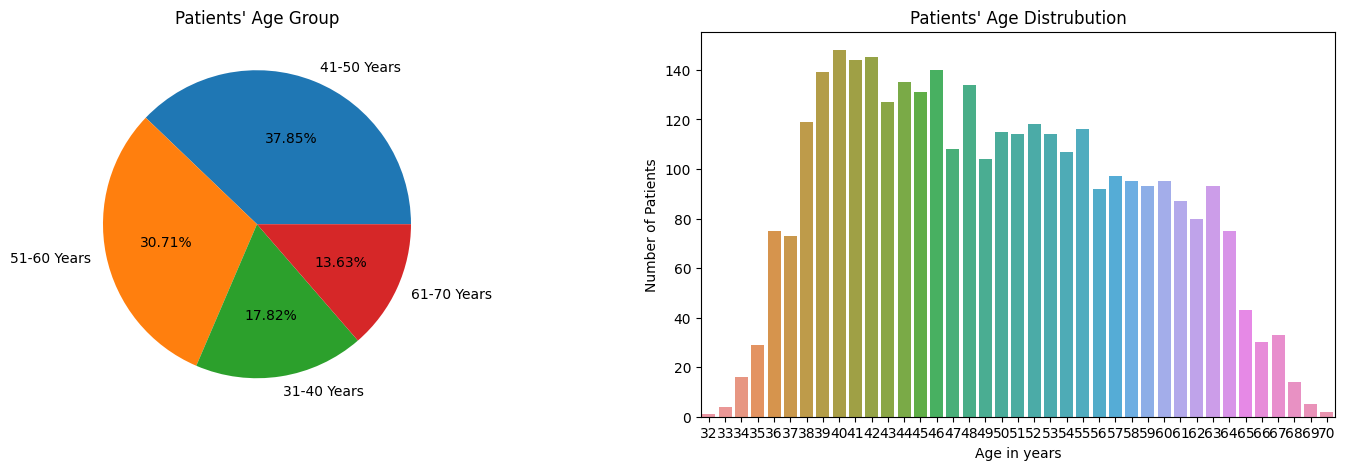

In [ ]:
# Chart - 3 visualization code

# Setting display figure size
fig = plt.figure(figsize = (18,5))

# Pie chart to check for the patients' age group
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(df['Age_Group'].value_counts(), labels = df['Age_Group'].value_counts().index, autopct = "%.02f%%")
plt.title("Patients' Age Group", fontsize = 12)

# Barplot to check for the distribution of patients' age
ax1 = plt.subplot2grid((1,2),(0,1))
a = df['age'].value_counts()
sns.barplot(x = a.index, y = a.values, ci=None)
plt.ylabel('Number of Patients')
plt.xlabel('Age in years')
plt.title("Patients' Age Distrubution")

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In [ ]:
# Finding the value count of patients in each age group
df['Age_Group'].value_counts().reset_index().rename(columns={'index':'Age_Group','Age_Group': 'Patients'})

,Age_Group,Patients
0,41-50 Years,1283
1,51-60 Years,1041
2,31-40 Years,604
3,61-70 Years,462


Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

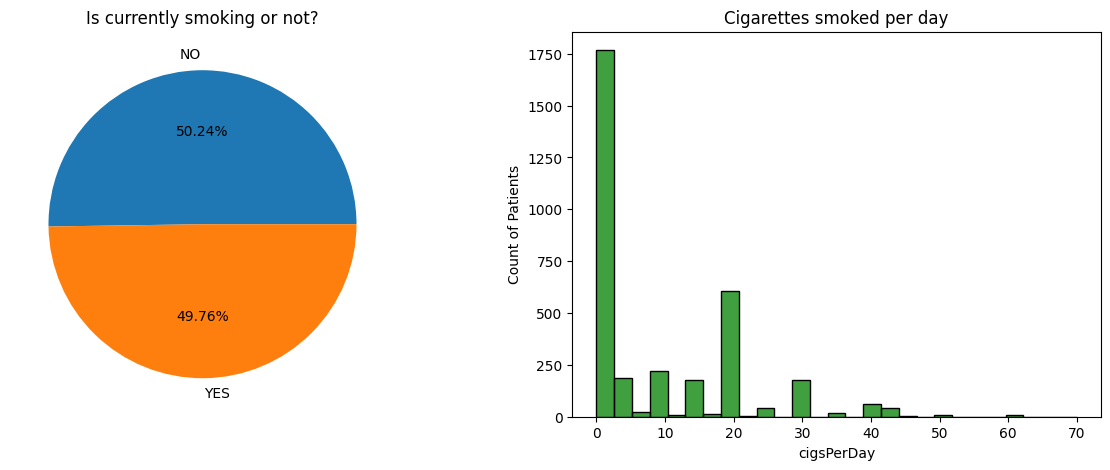

In [ ]:
# Chart - 4 visualization code

# Setting display figure size
fig = plt.figure(figsize = (15,5))

# Plotting a Pie Chart to visualize if the patient is currently smoking or not
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(df['is_smoking'].value_counts(), labels = df['is_smoking'].value_counts().index, autopct = "%.02f%%")
plt.title("Is currently smoking or not?", fontsize = 12)

# Histogram chart to check for the number of cigarettes smoked by patients each day
ax1 = plt.subplot2grid((1,2),(0,1))
sns.histplot(df["cigsPerDay"], color = 'g')
plt.ylabel('Count of Patients')
plt.title("Cigarettes smoked per day", fontsize = 12)

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

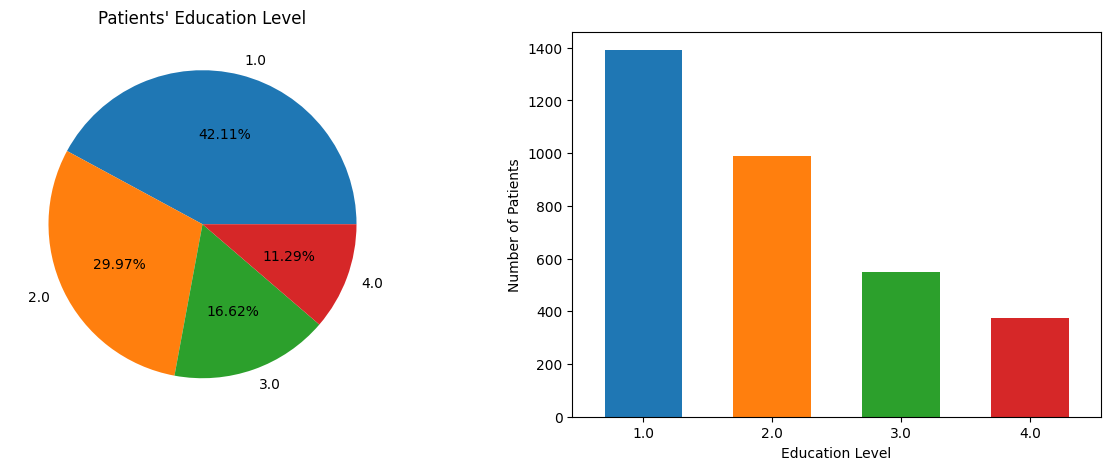

In [ ]:
# Chart - 5 visualization code

# Setting display figure size
fig = plt.figure(figsize = (15,5))

# Pie chart to check for the patients' education level
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(df['education'].value_counts(), labels = df['education'].value_counts().index, autopct = "%.02f%%")
plt.title("Patients' Education Level", fontsize = 12)

# Bar chart to check for the patients' education level
ax1 = plt.subplot2grid((1,2),(0,1))
edu = df["education"].value_counts()
edu.plot.bar(width = 0.6, color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xlabel("Education Level")
plt.ylabel("Number of Patients")
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

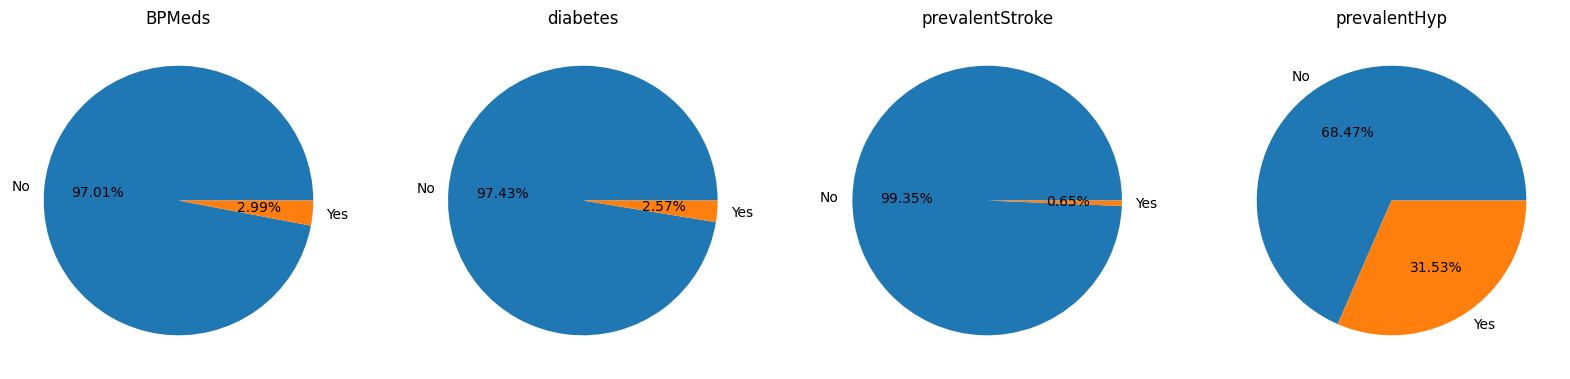

In [ ]:
# Chart - 6 visualization code

# Creating a list of columns that contain numerical data with possible outliers
columns = ['BPMeds','diabetes','prevalentStroke','prevalentHyp']

# Setting the display figure size
plt.figure(figsize=(20,5))

n = 1

# Creating boxplots for each of the column/features
for col in columns:
  plt.subplot(1,4,n)
  n = n+1
  plt.pie(df[col].value_counts(), labels = ['No','Yes'], autopct = "%.02f%%")
  plt.title(col)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

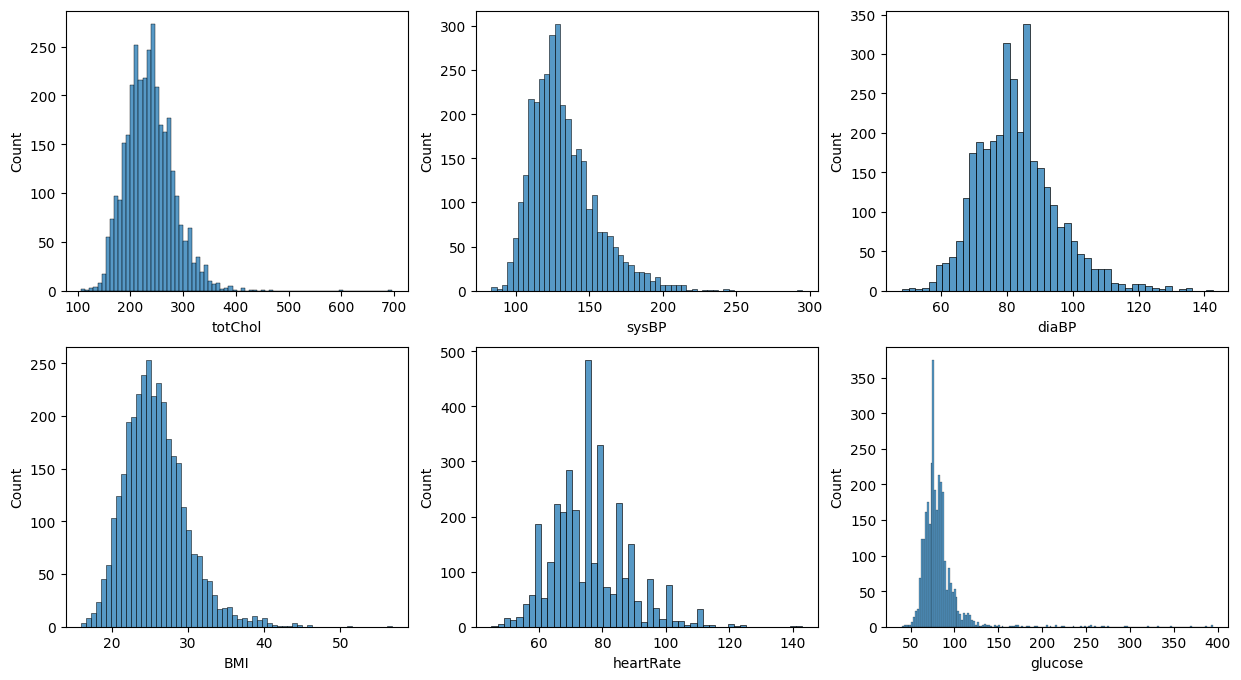

In [ ]:
# Chart - 7 visualization code

# Creating a list of columns that contain numerical data
columns = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Setting the display figure size
plt.figure(figsize=(15,8))

n = 1

# Creating violinplots for each of the column/features
for col in columns:
  plt.subplot(2,3,n)
  n = n+1
  sns.histplot(df[col])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

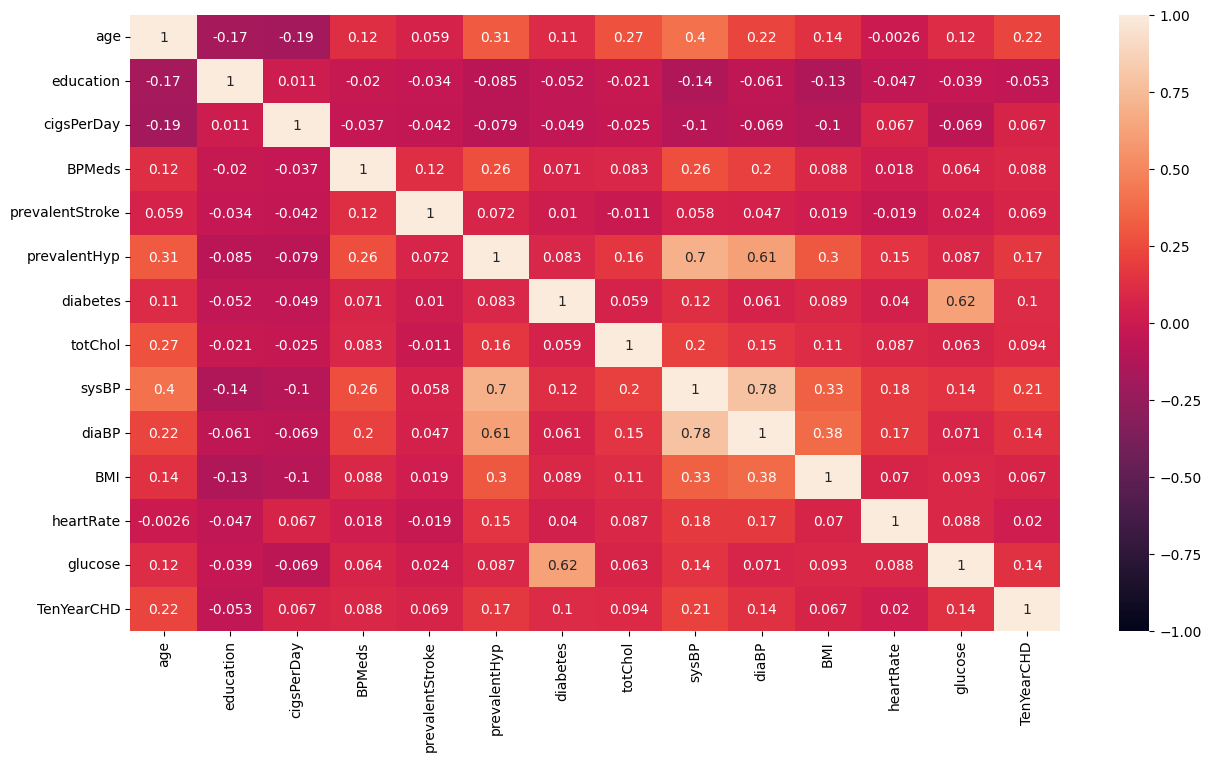

In [ ]:
# Correlation Heatmap visualization code

# Setting the plot size
f, ax = plt.subplots(figsize=(15,8))

# Creating a heat map of 'store' to find correlation
sns.heatmap(df.corr(),  vmin=-1, annot = True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

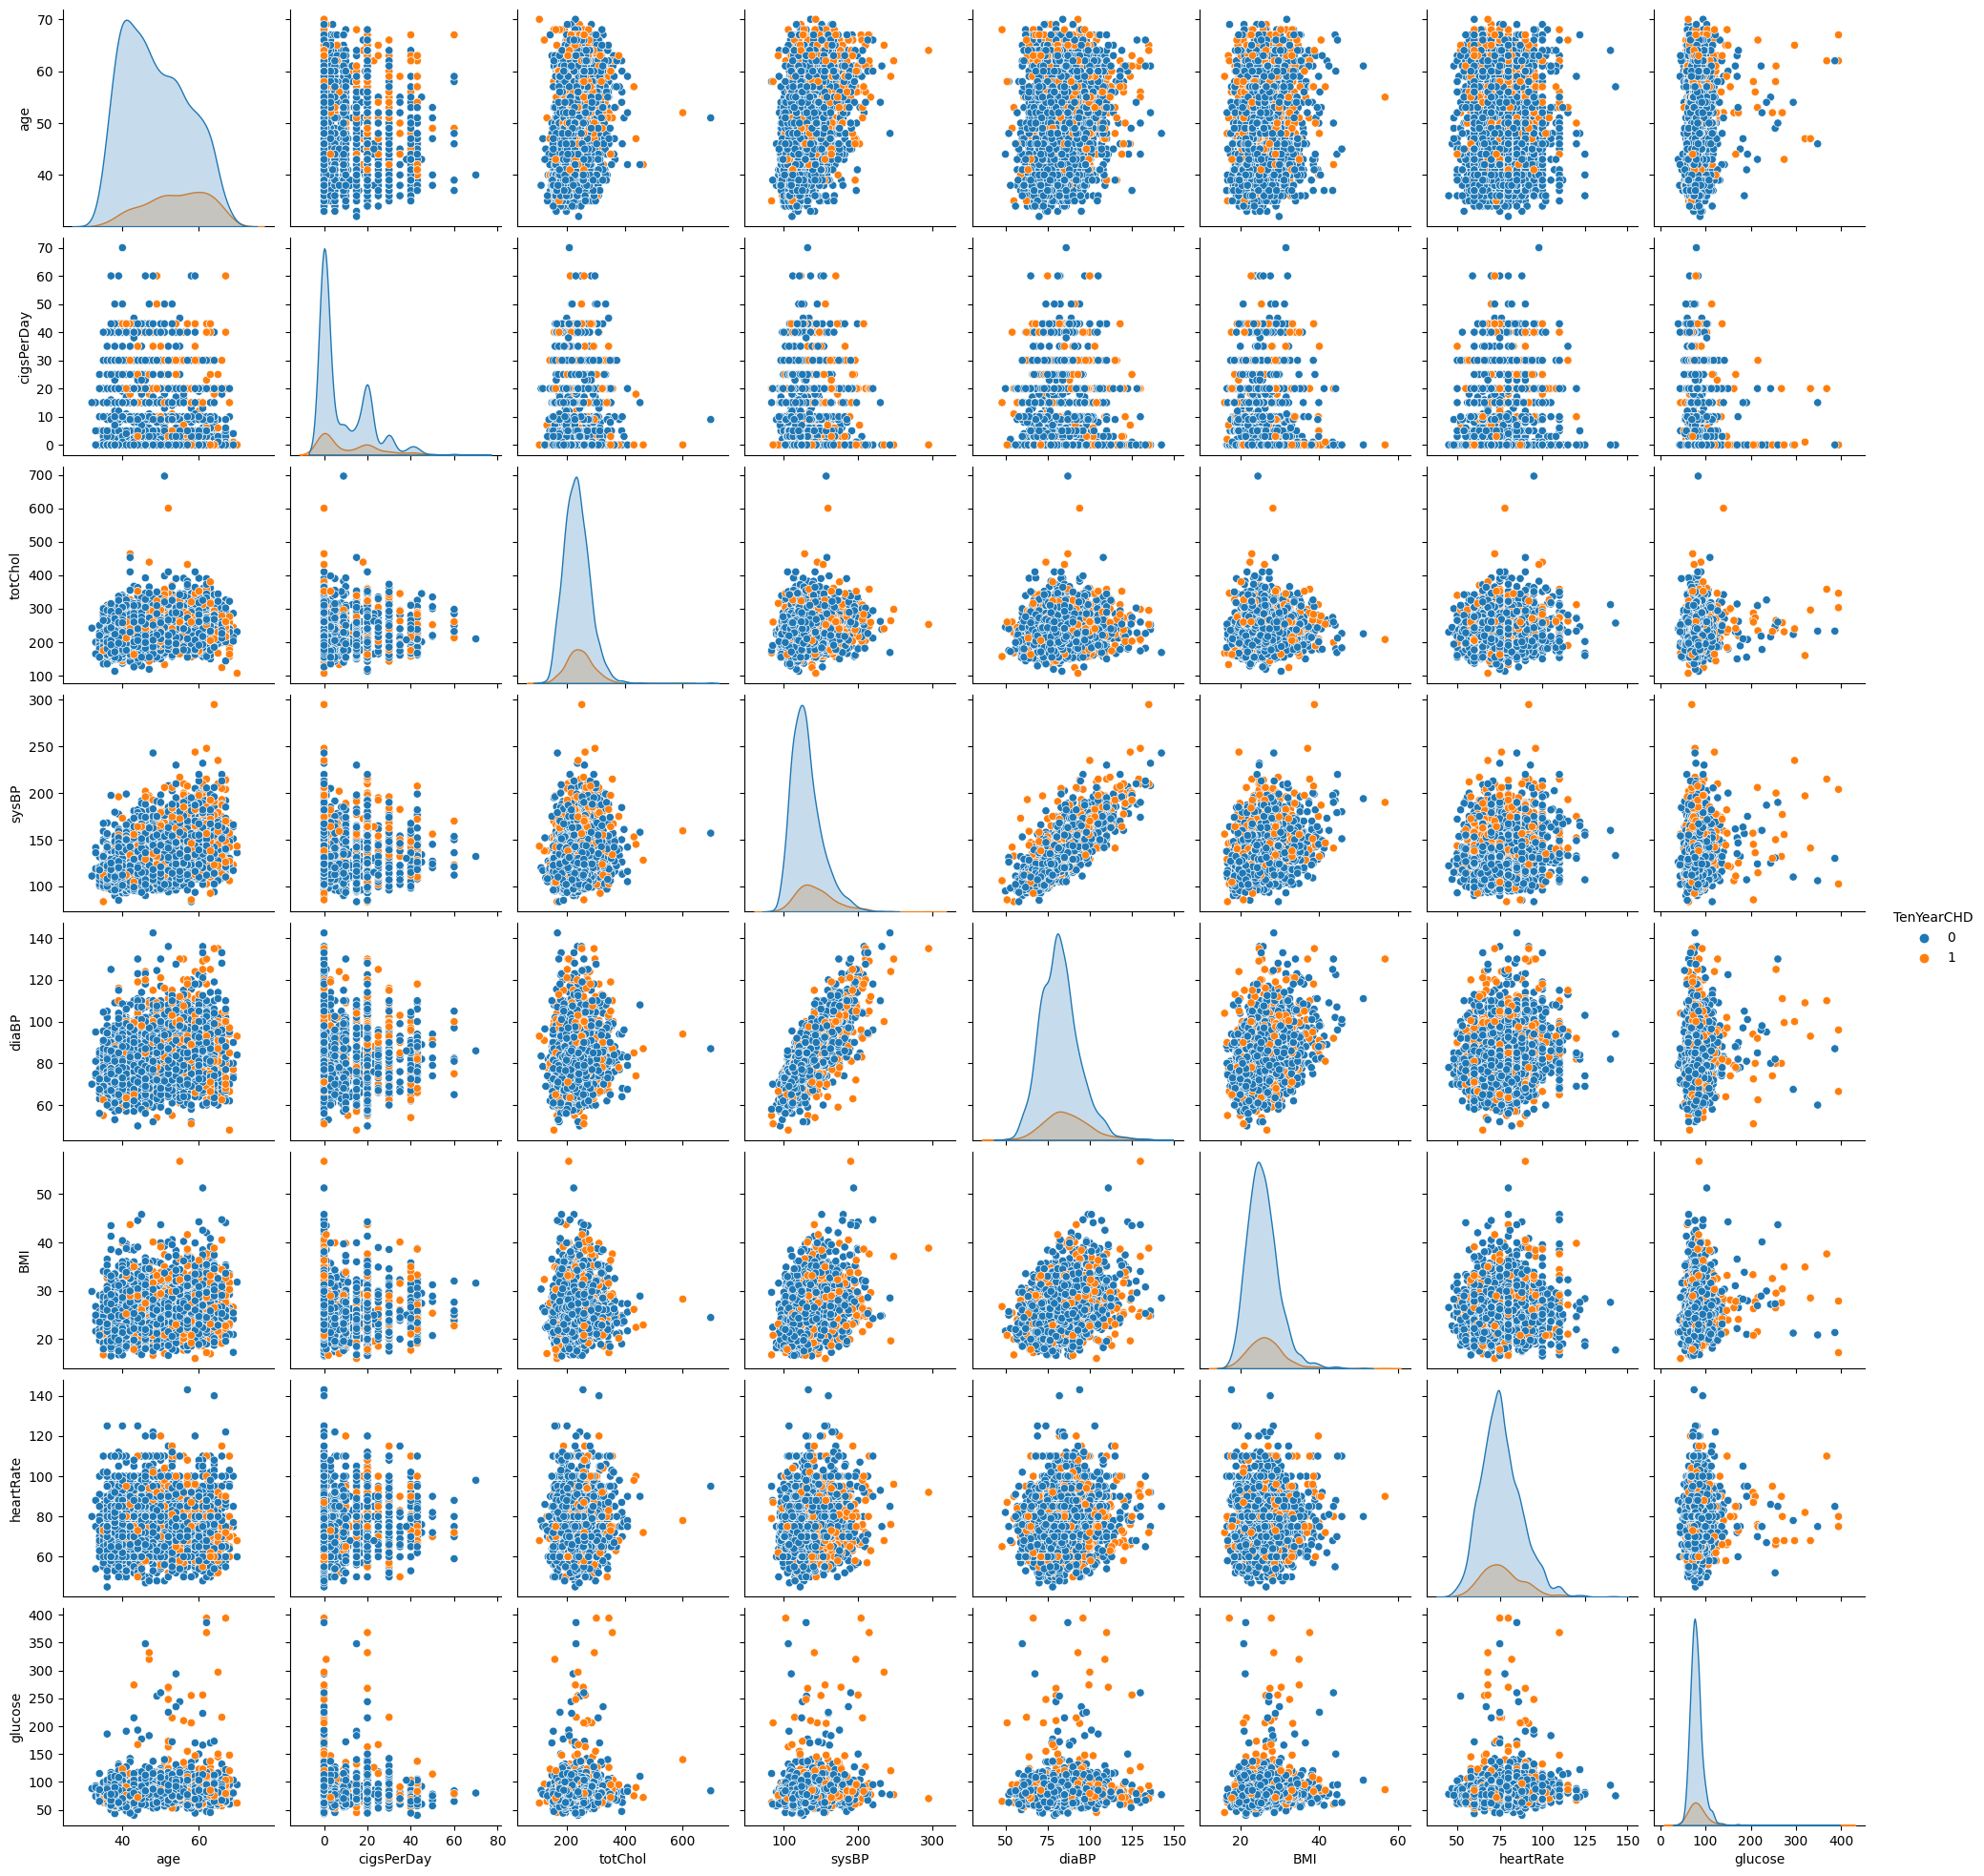

In [ ]:
# Pair Plot visualization code

sns.pairplot(df, vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'], hue="TenYearCHD")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

print(f"The number of missing/null values in dataset 'df' are: \n")
print(df.isnull().sum())

The number of missing/null values in dataset 'df' are: 

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Age_Group               0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values. Hence there is no need for missing value imputation.

### 2. Handling Outliers

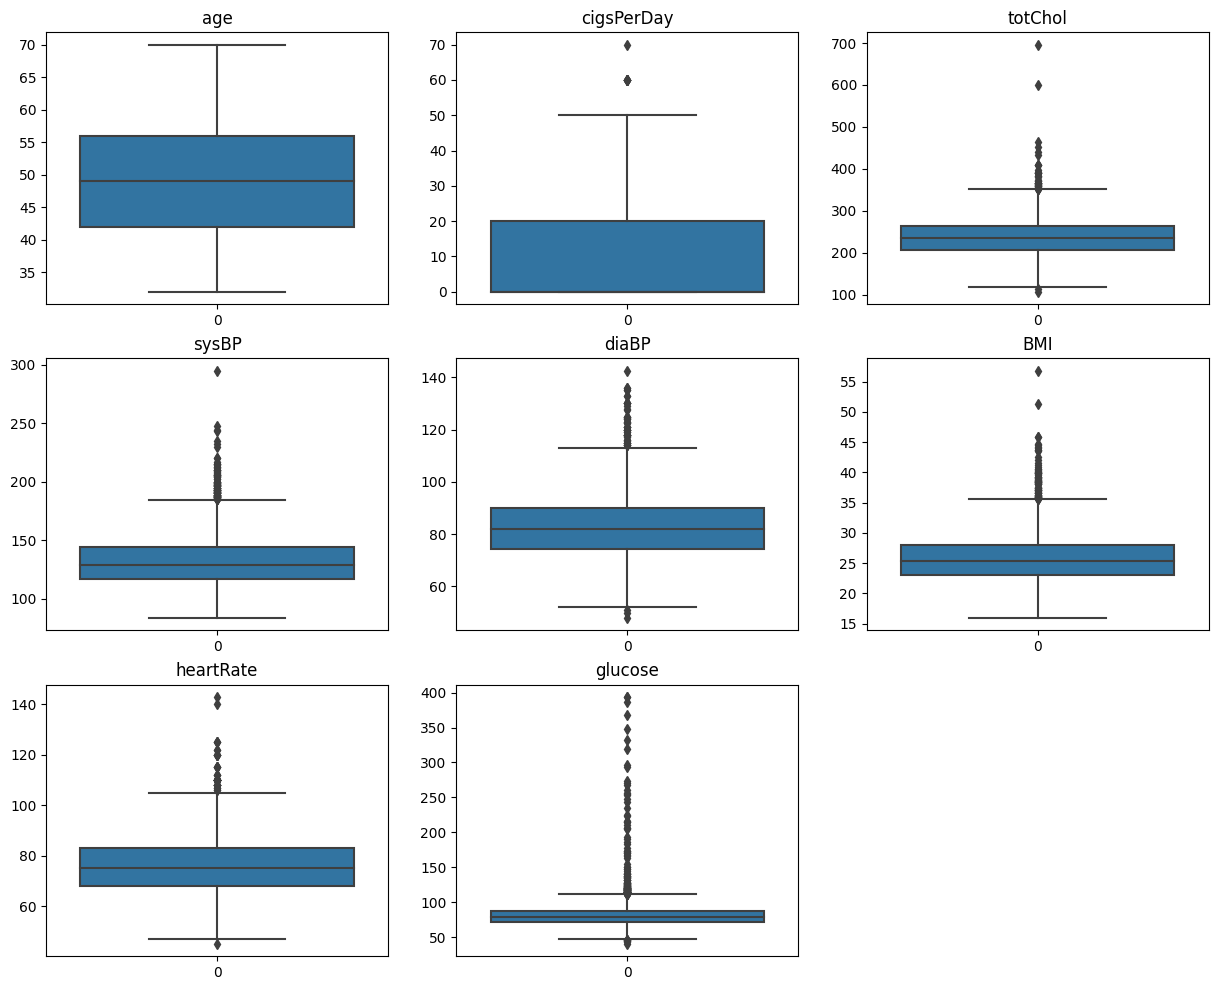

In [ ]:
# Handling Outliers & Outlier treatments

# Creating a list of columns that contain numerical data with possible outliers
columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Setting the display figure size
plt.figure(figsize=(15,12))

n = 1

# Creating boxplots for each of the column/features
for col in columns:
  plt.subplot(3,3,n)
  n = n+1
  sns.boxplot(df[col])
  plt.title(col)

##### What all outlier treatment techniques have you used and why did you use those techniques?

I handled the outliers in the feature 'Annual_Premium' by assigning a value of 75000 for all the observations beyond the 99th percentile.

Imputing a value to all the observations with very high annual premium serves two purposes: 1) It keeps the information (that the premium is high) intact. 2) We donot lose any data as would have been the case if we simply deleted all the observations with outlier annual premium values.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Performing Label encoding on the columns 'sex' and 'is_smoking'
df['sex'] = df['sex'].map({'M':0, 'F':1})
df['is_smoking'] = df['is_smoking'].map({'NO':0, 'YES':1})

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used one-hot encoding for the feature 'Gender' as there is no hierarchy or natural order between its two classes.

I used label encoding for the categorical columns: 'Vehicle_Age' and 	'Vehicle_Damage'.

* Vehicle Damage has only two classes 'Yes' and 'No', so it could easily be encoded using label encoding technique.

* Vehicle Age has three classes: '< 1 Year', '1-2 Year' and '> 2 Years'. These classes have an ordinal data characteristic. Hence, label encoding is appropriate.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

<b> Not Applicable

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

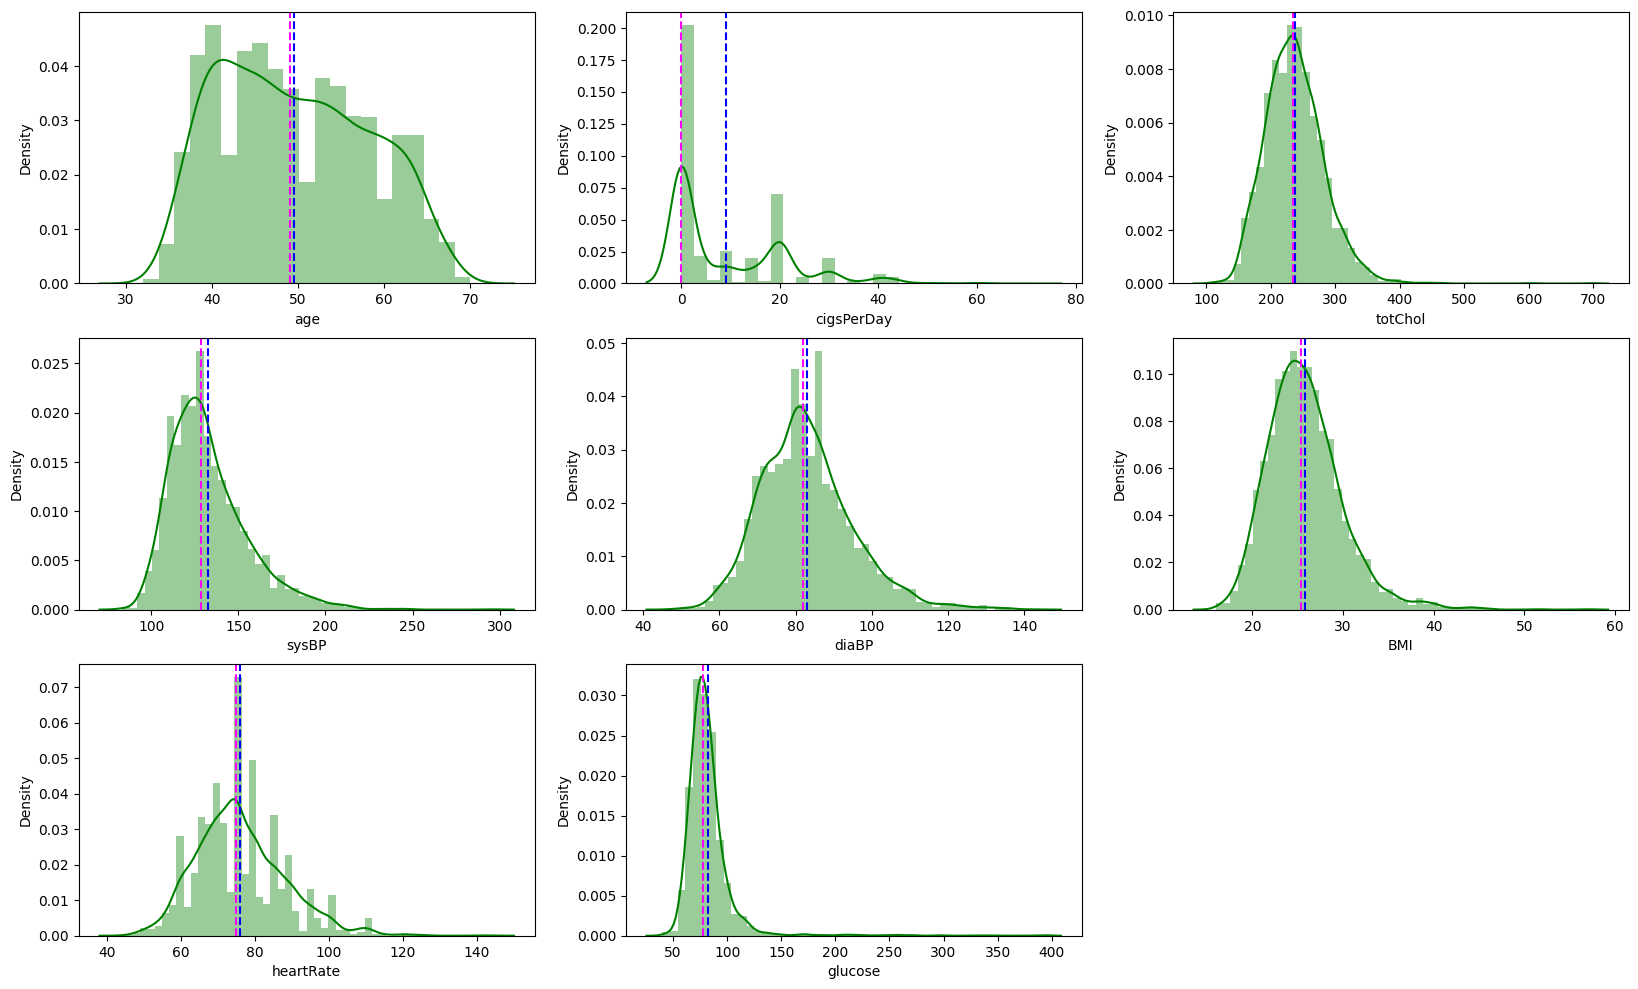

In [ ]:
# Transform Your data

features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

fig = plt.figure(figsize = (20,12))
ax1=fig.gca()

n=1

for col in features:
  ax1 = plt.subplot(3,3,n)
  sns.distplot(df[col], color = 'g')
  ax1.axvline(df[col].mean(),color='blue', linestyle='dashed')
  ax1.axvline(df[col].median(),color='magenta', linestyle='dashed')
  n = n+1

plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Checking for skewness of the original data in 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate' and 'glucose'
df_features = pd.DataFrame()
df_features = df[features]
df_features.skew(axis = 0, skipna = True)

age           0.225796
cigsPerDay    1.223005
totChol       0.940636
sysBP         1.175837
diaBP         0.718173
BMI           1.022252
heartRate     0.676490
glucose       6.144390
dtype: float64

· If the skewness is between -0.5 and 0.5, the data is fairly symmetrical

· If the skewness is between -1 and - 0.5 or between 0.5 and 1, the data is moderately skewed

· If the skewness is less than -1 or greater than 1, the data is highly skewed

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Answer here

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Not required in our case.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Dimensionality reduction was not done on our dataset.

### 7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.



I split the dataset into train and test datasets using stratified sampling on our dependent variable 'TenYearCHD'. Using a stratified sampling ensures that the distribution of dependent variable remains same across train and test datasets.

In [ ]:
# split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9, stratify = y)

# describes info about train and test set
print("Shape of train dataset: ", X_train.shape)
print("Shape of test dataset: ", X_test.shape)

In [ ]:
# Get the unique values of the target variable and their counts

i=0
a = [y_train, y_test]
b = ['train','test']
while i < len(a):
  unique_values, counts = np.unique(a[i], return_counts=True)
  for value, count in zip(unique_values, counts):
    print(f"In the {b[i]} dataset, {value} occurs {count} times")
  i=i+1
  print('\n')

##### What data splitting ratio have you used and why?

80:20 is the most commonly used ratio to split the dataset into train and test sets. I have used the same ratio.

### 8. Data Scaling

In [ ]:
# Scaling your data



##### Which method have you used to scale you data and why?

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling imbalance dataset using SMOTE
sm = SMOTE(random_state = 18)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Finding the shape of final train and test set
print("Number of observations in X_train dataset: ", X_train.shape)
print("Number of observations in y_train dataset: ", y_train.shape)
print("Number of observations in X_test dataset: ", X_test.shape)
print("Number of observations in y_test dataset: ", y_test.shape)

In [ ]:
# Get the unique values of the target variable and their counts
unique_values, counts = np.unique(y_train, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} times")

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer here

## ***7. ML Model Implementation***

### ML Model - 1: Logistic Regression

In [ ]:
# ML Model - 1 Implementation of Logistic Regression
lg_clf = LogisticRegression(fit_intercept=True, max_iter=10000)

# Fit the Algorithm
lg_clf.fit(X_train, y_train)

In [ ]:
# Predict on the model

# Get the predicted classes
train_class_preds = lg_clf.predict(X_train)
test_class_preds = lg_clf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

print("\nModel Performance Report using Logistic Regression\n")
print("Training Performance:",classification_report(y_train,train_class_preds),sep="\n")
print("roc_auc_score: ", roc_auc_score(y_train, train_class_preds))
print()
print("Test Performance:",classification_report(y_test,test_class_preds),sep="\n")
print("roc_auc_score: ", roc_auc_score(y_test, test_class_preds))


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2: Random Forest Classifier

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
print("\nModel Performance Report using Random Forest Classifier\n")
print("Training Performance:",classification_report(y_train,train_class_preds),sep="\n")
print("roc_auc_score: ", roc_auc_score(y_train, train_class_preds))
print()
print("Test Performance:",classification_report(y_test,test_class_preds),sep="\n")
print("roc_auc_score: ", roc_auc_score(y_test, test_class_preds))

In [ ]:
importance_rf = pd.DataFrame({'Feature': X.columns,
                              'Importance': rf_model.feature_importances_}
                             ).sort_values('Importance', ascending = False)

sns.barplot(data = importance_rf, x ='Importance', y ='Feature')
plt.title('Feature Importance using Random Forest Classifier')
plt.rcParams['figure.figsize'] = (10, 6)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning

rf_tuned = RandomForestClassifier()
grid_values = {'n_estimators':[100,150,200], 'max_depth':[3,5,8,12], 'min_samples_split':[50,100], 'min_samples_leaf':[40,50]} # n_estimators is no of trees you want to build
rf_tuned = GridSearchCV(rf_tuned, param_grid = grid_values, scoring = 'roc_auc', cv = 3)

# Fit the Algorithm to train dataset
rf_tuned.fit(X_train, y_train)

# Predict on the model
test_class_preds = rf_tuned.predict(X_test)
train_class_preds = rf_tuned.predict(X_train)


In [ ]:
print("The best fit parameters are found out to be :" , rf_tuned.best_params_)
print("\nUsing ",rf_tuned.best_params_, ", roc_auc is: ", rf_tuned.best_score_)

In [ ]:
print("\nModel Performance Report using Random Forest Classifier with hyperparameter tuning\n")
print("Training Performance:",classification_report(y_train,train_class_preds),sep="\n")
print("roc_auc_score: ", roc_auc_score(y_train, train_class_preds))
print()
print("Test Performance:",classification_report(y_test,test_class_preds),sep="\n")
print("roc_auc_score: ", roc_auc_score(y_test, test_class_preds))

In [ ]:
importance_rf_tuned = pd.DataFrame({'Feature': X.columns,
                              'Importance': rf_tuned.best_estimator_.feature_importances_}
                             ).sort_values('Importance', ascending = False)

sns.barplot(data = importance_rf_tuned, x ='Importance', y ='Feature')
plt.title('Feature Importance using Random Forest Classifier with hyperparameter tuning')
plt.rcParams['figure.figsize'] = (10, 6)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3: XGBoost Classifier

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the XGBoost Classifier
xgb_model = XGBClassifier()

# Fit the Algorithm
xgb_model.fit(X_train,y_train)

# Making predictions on train and test data
train_class_preds = xgb_model.predict(X_train)
test_class_preds = xgb_model.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
print("\nModel Performance Report using XGBoost Classifier\n")
print("Training Performance:",classification_report(y_train,train_class_preds),sep="\n")
print("roc_auc_score: ", roc_auc_score(y_train, train_class_preds))
print()
print("Test Performance:",classification_report(y_test,test_class_preds),sep="\n")
print("roc_auc_score: ", roc_auc_score(y_test, test_class_preds))

In [ ]:
# Visualizing evaluation Metric Score chart

# Classification Report for train dataset
print("Classification Report for train dataset using XGBoost Classifier:")
print(classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_train, train_class_preds))

In [ ]:
# Classification Report for test dataset
print("Classification Report for test dataset using XGBoost Classifier:")
print(classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_test, test_class_preds))

In [ ]:
importance_xgb = pd.DataFrame({'Feature': X.columns,
                              'Importance': xgb_model.feature_importances_}
                             ).sort_values('Importance', ascending = False)

sns.barplot(data = importance_xgb, x ='Importance', y ='Feature')
plt.title('Feature Importance using XGBoost Classifier')
plt.rcParams['figure.figsize'] = (10, 6)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization
xgb_tuned = XGBClassifier()
params = {'n_estimators':[50,100,150,200], 'max_depth':[3,5,8,10,15], 'learning_rate':[0.05,0.10,0.15,0.2]}
xgb_tuned = RandomizedSearchCV(xgb_tuned, param_distributions = params, n_jobs = None, n_iter = 20,
                                random_state = 27, scoring = 'roc_auc', cv = 3)

# Fit the Algorithm to train dataset
xgb_tuned.fit(X_train, y_train)

In [ ]:
print("The best fit parameters are found out to be :" , xgb_tuned.best_params_)
print("\nUsing ",xgb_tuned.best_params_, ", roc_auc is: ", xgb_tuned.best_score_)

# Predict on the model
test_class_preds = xgb_tuned.predict(X_test)
train_class_preds = xgb_tuned.predict(X_train)

In [ ]:
# Classification Report for train dataset
print("Classification Report for train dataset using XGBoost Classifier with hyperparameter tuning:")
print(classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_train, train_class_preds))

In [ ]:
# Get the confusion matrix for test data
cm_xgb_tuned = confusion_matrix(y_test, test_class_preds)
print("Confusion Matrix for test data using XGBoost Classifier with hyperparameter tuning:")
print(cm_xgb_tuned,"\n")

disp = ConfusionMatrixDisplay(cm_xgb_tuned)
disp.plot()
plt.show()

In [ ]:
# Classification Report for test dataset
print("Classification Report for test dataset using XGBoost Classifier with hyperparameter tuning:")
print(classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(roc_auc_score(y_test, test_class_preds))

In [ ]:
print("\nModel Performance Report using XGBoost Classifier with hyperparameter tuning\n")
print("Training Performance:",classification_report(y_train,train_class_preds),sep="\n")
print("roc_auc_score: ", roc_auc_score(y_train, train_class_preds))
print()
print("Test Performance:",classification_report(y_test,test_class_preds),sep="\n")
print("roc_auc_score: ", roc_auc_score(y_test, test_class_preds))

In [ ]:
importance_xgb_tuned = pd.DataFrame({'Feature': X.columns,
                              'Importance': xgb_tuned.best_estimator_.feature_importances_}
                             ).sort_values('Importance', ascending = False)

sns.barplot(data = importance_xgb_tuned, x ='Importance', y ='Feature')

plt.title('Feature Importance using XGBoost Classifier with hyperparameter tuning')
plt.rcParams['figure.figsize'] = (10, 6)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***